In [10]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)

#### Data Cleaning

In [11]:
# Opening the csv file

df = pd.read_csv(r'dataset.csv')

df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [12]:
# Get Data information

df.info(max_cols = None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
# Get Data shape

shape = df.shape

print(f'The Dataset has {shape[0]} Rows and {shape[1]} Columns')

The Dataset has 1470 Rows and 35 Columns


In [14]:
# Check for Empty cells and null values

df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [15]:
# Check for Duplicates

df.duplicated().sum()

np.int64(0)

In [16]:
# Get the Value Count of each Column

df.nunique().sort_values()


,0
EmployeeCount,1
Over18,1
StandardHours,1
Attrition,2
OverTime,2
PerformanceRating,2
Gender,2
BusinessTravel,3
Department,3
MaritalStatus,3


In [17]:
# Get redundant columns

redundant_cols = []

for col in df.columns.tolist() :
     if df[col].nunique() == 1 :
        redundant_cols.append(col)

redundant_cols

['EmployeeCount', 'Over18', 'StandardHours']

In [18]:
# Remove redundancy

df.drop(columns = redundant_cols, inplace = True)

df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


### Feature Engineering

In [19]:
# Check for Numerical Columns

numerical_cols = df.select_dtypes(include = 'int').columns.tolist()

print(str( len(numerical_cols) ) + ' Numerical Columns \n \n' + str(numerical_cols) )

24 Numerical Columns 
 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [20]:
# Check for Categorical Columns

categorical_cols = df.select_dtypes( include = ['object', 'float'] ).columns.tolist()

print(str( len(categorical_cols) ) + ' Categorical Columns \n \n' + str(categorical_cols) )

8 Categorical Columns 
 
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


#### Feature Addition

In [21]:
# Add Debt Feature

df['Debt'] = df['MonthlyRate'] - df['MonthlyIncome']

df['Debt'].head(2)

,Debt
0,13486
1,19777


In [22]:
# Add Tenure Feature

df['Tenure'] = df['YearsAtCompany'] / df['Age']

df['Tenure'].head(2)

,Tenure
0,0.146341
1,0.204082


#### Feature Selection

In [23]:
# Define x

x = df.drop( columns = ['Attrition', 'EmployeeNumber'])

x.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Debt,Tenure
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,13486,0.146341
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,19777,0.204082


In [24]:
# Define and encode y (Dependent Variable)

y = df['Attrition'].map({ 'Yes': 1, 'No': 0 })

y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [25]:
# Get the categorical columns of variable x

x_categorical_cols = x.select_dtypes(include = ['float', 'object']).columns.tolist()

print(str( len(x_categorical_cols) ) + ' Categorical Columns of Independent Variable (x)  \n \n' + str(x_categorical_cols) )

8 Categorical Columns of Independent Variable (x)  
 
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Tenure']


#### Feature Encoding

In [26]:
# Instantiate Label Encoder

le = LabelEncoder()

In [27]:
# Encode x

for element in x_categorical_cols:
    x[element] = le.fit_transform(x[element])

x.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Debt,Tenure
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,13486,138
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,19777,186


#### Feature Scaling

In [28]:
# Instantiate StandardScaler

SS = StandardScaler()

In [29]:
# Scale x

Scaledx = SS.fit_transform(x)

Scaledx

array([[ 0.4463504 ,  0.59004834,  0.74252653, ...,  0.24583399,
         0.67623764, -0.16357923],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.80654148,
         1.42576899,  0.33777385],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.15593471,
        -0.89407285, -1.60496932],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.31487349,
        -1.04586159,  0.48400183],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  1.08689522,
         0.00510266,  0.19154586],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.59522723,
        -0.23663937, -0.41425577]])

#### Feature Correlation

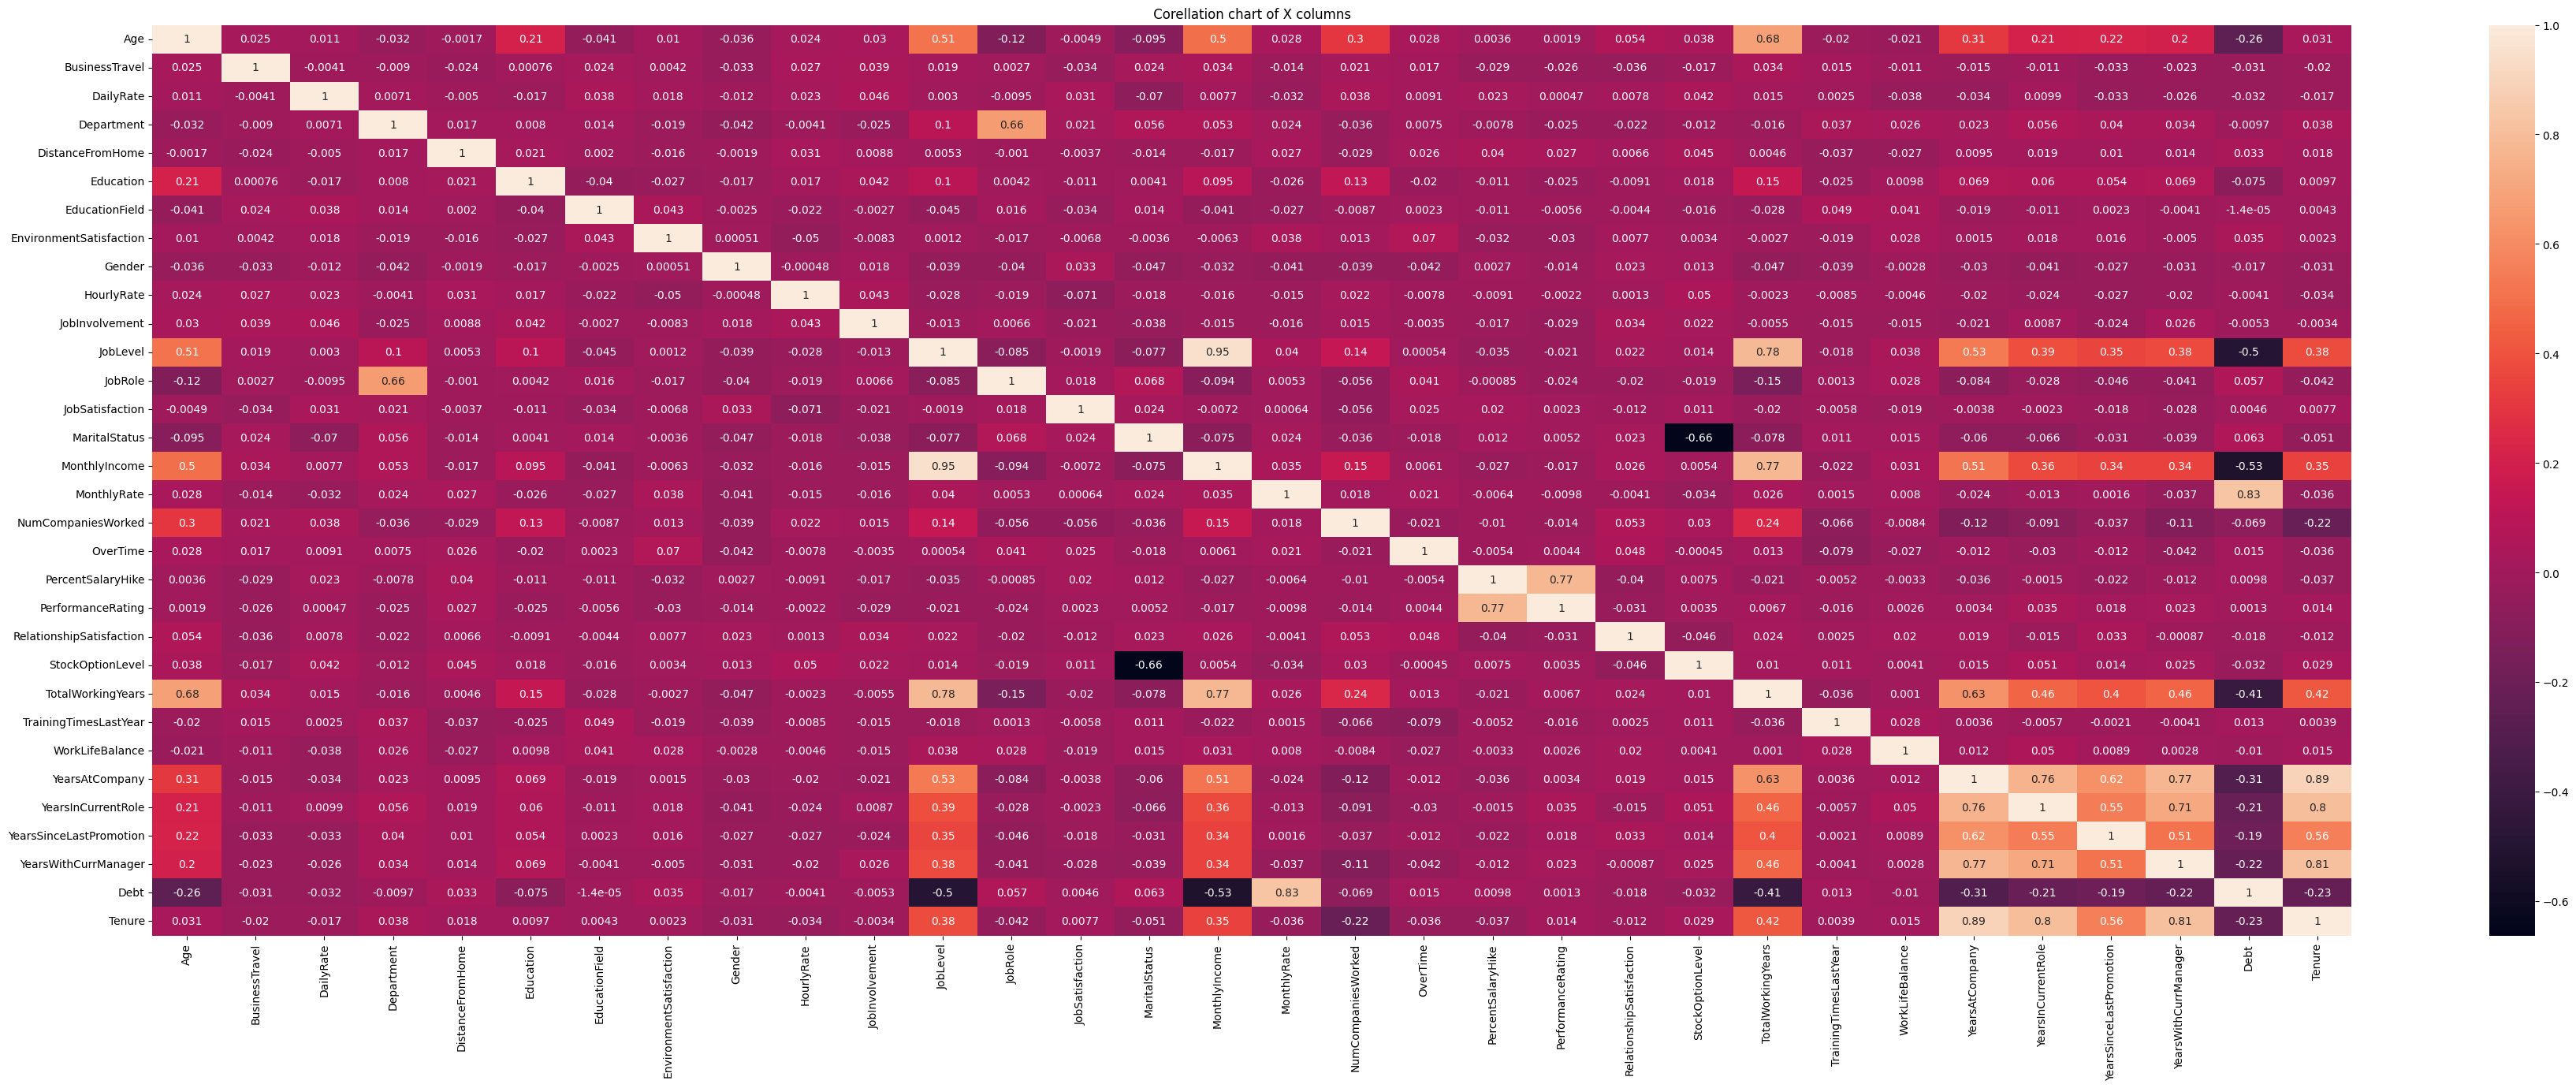

In [30]:
# Get the correlation chart of x columns

plt.figure(figsize = (45, 15))

sns.heatmap(x.corr(), annot = True)

plt.title(' Corellation chart of X columns ')

plt.show()

In [31]:
correlating = []

for i in range(35):
    correlation = corr(Scaledx[1][i], Scaledx[1][i+1])
    if correlation > 0.7:
        correlating.append(correlation)

correlating


NameError: name 'corr' is not defined

### Modelling

In [ ]:
# Instantiate Train_Test_Split

x_train, x_test, y_train, y_test = train_test_split(Scaledx, y, test_size=0.2, random_state=30)

#### Model Initiation

In [ ]:
# Instantiate Logistic Regression

Log = LogisticRegression()

In [ ]:
# Instantiate XGBClassifier

Boost = XGBClassifier()

In [ ]:
# Instantiate RandomForestClassifier

Forest = RandomForestClassifier(random_state = 30)

#### Training

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
# Training by Logistic Regression

Log.fit(x_train, y_train)

In [ ]:
# Training XGBClassifier

Boost.fit(x_train, y_train)

In [ ]:
# Training by Random Forest Classifier

Forest.fit(x_train, y_train)

#### Testing

In [ ]:
Log_prediction = Log.predict(x_test)

In [ ]:
Boost_prediction = Boost.predict(x_test)

In [ ]:
Forest_prediction = Forest.predict(x_test)

#### Metrics Evaluation

In [ ]:
# Accuracy_Score for Logistic Regression

accuracy_score(y_test, Log_prediction)

In [ ]:
# Accuracy_Score for XGBClassifier

accuracy_score(y_test, Boost_prediction)

In [ ]:
# Accuracy_Score for RandomForestClassifier

accuracy_score(y_test, Forest_prediction)

In [ ]:
# Check Data balance

print(y.value_counts())

In [ ]:
print(str((237/1233)*100) + '%')